In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


## import the data

In [3]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Starting with EDA

In [4]:
import pandas_profiling
from pandas_profiling import ProfileReport
from loky import get_reusable_executor
profile = ProfileReport(train, title='Pandas Profiling Report', html={'style':{'full_width':True}})
profile

In [217]:
#precentage of women survived
women = train.loc[train.Sex == 'female']["Survived"]
rate_women = sum(women) / len(women)

In [218]:
#precentage of men survived
men = train.loc[train.Sex == 'male']["Survived"]
rate_men = sum(men) / len(men)

In [219]:
print(str(rate_women) + '% womens survived')
print(str(rate_men) + '% mens survived')

0.7420382165605095% womens survived
0.18890814558058924% mens survived


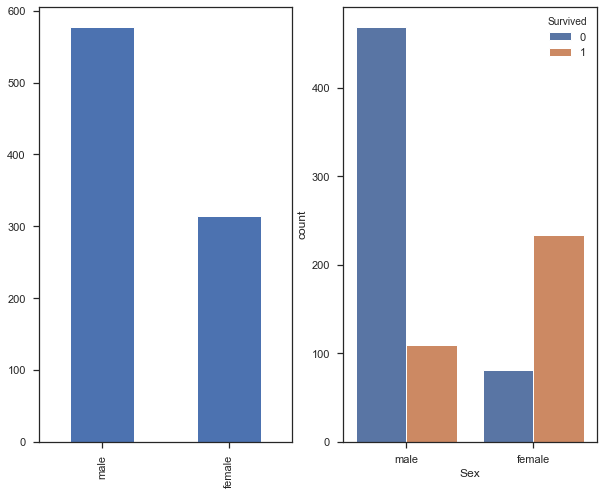

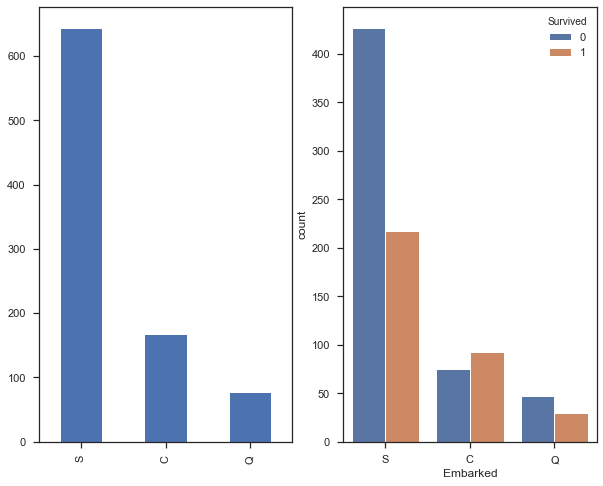

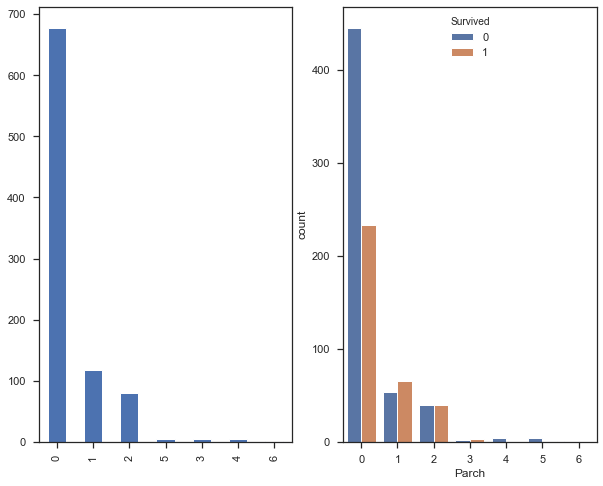

In [220]:
object_bol = train.dtypes == 'object'


#for i in train.dtypes[object_bol].index:
for i in ['Sex','Embarked','Parch']:
    fig, ax = plt.subplots(1,2, figsize = (10,8))
    train[i].value_counts().plot.bar(ax = ax[0])
    sns.countplot(i,hue = 'Survived', data = train, ax = ax[1])
    plt.show()



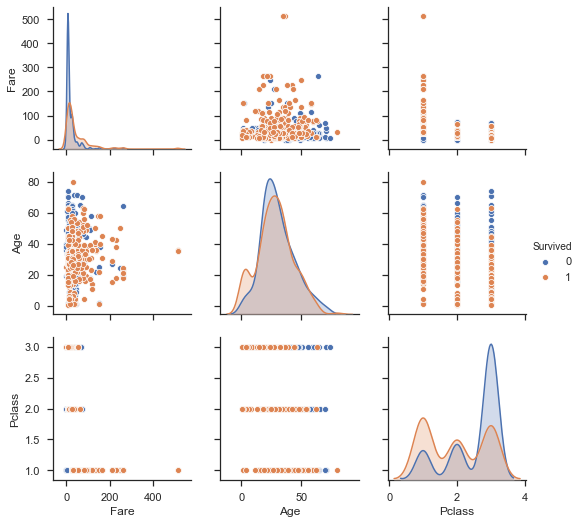

In [221]:
sns.set(style = "ticks",color_codes = True)
sns.pairplot(train, vars = ['Fare','Age','Pclass'],hue = 'Survived')
plt.show()

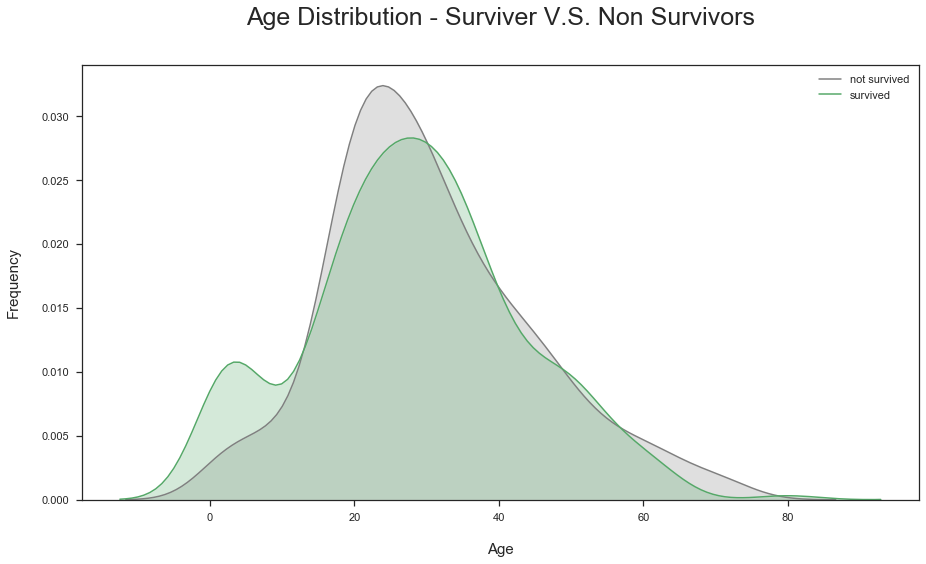

In [222]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
ax=sns.kdeplot(train.loc[(train['Survived'] == 0),'Age'] , color='gray',shade=True,label='not survived')
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Age'] , color='g',shade=True, label='survived')
plt.title('Age Distribution - Surviver V.S. Non Survivors', fontsize = 25, pad = 40)
plt.xlabel("Age", fontsize = 15, labelpad = 20)
plt.ylabel('Frequency', fontsize = 15, labelpad= 20);

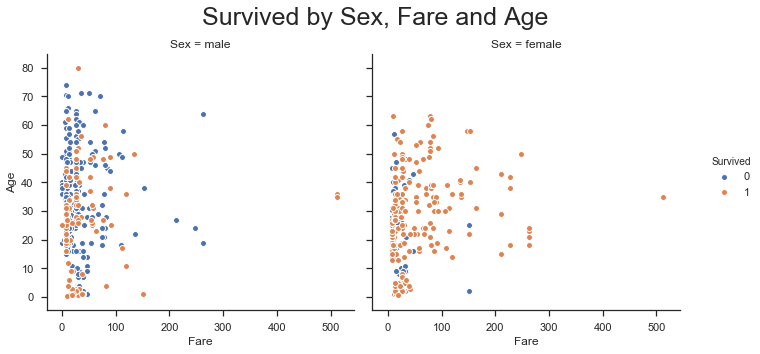

In [223]:
g = sns.FacetGrid(train, size=5,hue="Survived", col ="Sex", margin_titles=True)
g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend()
g.fig.suptitle("Survived by Sex, Fare and Age", size = 25)
plt.subplots_adjust(top=0.85)

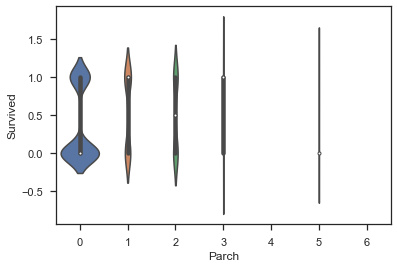

In [224]:
sns.violinplot(x ='Parch', y = 'Survived' ,data = train,scale = "count")

## drop not relevant columns

In [225]:
train['Cabin'] = train['Cabin'].notnull().astype(int) #if the data is NaN, then change to be 0, else change to be 1 in data frame

In [226]:
train.drop(['PassengerId','Ticket','Name'],axis = 1,inplace=True)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,0,S
1,1,1,female,38.0,1,0,71.2833,1,C
2,1,3,female,26.0,0,0,7.9250,0,S
3,1,1,female,35.0,1,0,53.1000,1,S
4,0,3,male,35.0,0,0,8.0500,0,S


In [227]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.228956
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.420397
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [228]:
# Overview(Survived vs non survied)
survived_summary = train.groupby("Survived")
survived_summary.mean().reset_index()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin
0,0,2.531876,30.626179,0.553734,0.329690,22.117887,0.123862
1,1,1.950292,28.343690,0.473684,0.464912,48.395408,0.397661


In [229]:
survived_summary = train.groupby("Sex")
survived_summary.mean().reset_index()

,Sex,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin
0,female,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818,0.308917
1,male,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893,0.185442


## Correlation Matrix and Heatmap

In [230]:
train['Sex'] = train['Sex'].map({'female':0,'male':1})

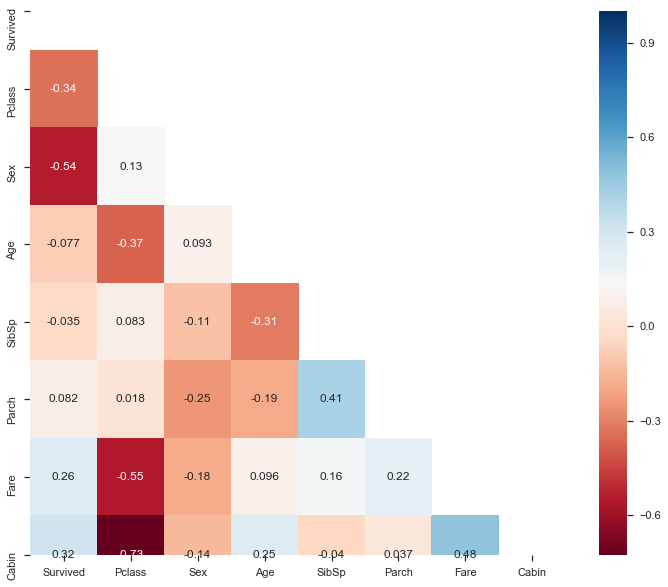

In [231]:
import numpy as np
mask = np.zeros_like(train.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.subplots(figsize = (12,10))
sns.heatmap(train.corr(), 
            annot=True,
            mask = mask,
            cmap = 'RdBu', ## in order to reverse the bar replace "RdBu" with "RdBu_r"
            linecolor='white')

## Feature Eng

In [232]:
# family size
train['family_size'] = train.SibSp + train.Parch+1

In [233]:
## bin the family size. 
def family_group(size):
    """
    This funciton groups(loner, small, large) family based on family size
    """
    
    a = ''
    if (size <= 1):
        a = 'loner'
    elif (size <= 4):
        a = 'small'
    else:
        a = 'large'
    return a

train['family_group'] = train['family_size'].map(family_group)

In [234]:
#is alone
train['is_alone'] = [1 if i<2 else 0 for i in train.family_size]


In [235]:
#calculated_fare
train['calculated_fare'] = train.Fare/train.family_size


In [236]:
#fare_group
def fare_group(fare):
    """
    This function creates a fare group based on the fare provided
    """
    
    a= ''
    if fare <= 4:
        a = 'Very_low'
    elif fare <= 10:
        a = 'low'
    elif fare <= 20:
        a = 'mid'
    elif fare <= 45:
        a = 'high'
    else:
        a = "very_high"
    return a

train['fare_group'] = train['calculated_fare'].map(fare_group)

# Creating Dummy Variables

In [171]:
train = pd.get_dummies(train, 
                       columns=["Pclass", 'Cabin','Embarked', 'family_group', 'fare_group'], 
                       drop_first=False)

In [181]:
train.drop(['family_size', 'Fare'], axis=1, inplace=True)
train.head()

,Survived,Sex,Age,SibSp,Parch,is_alone,calculated_fare,Pclass_1,Pclass_2,Pclass_3,...,Embarked_Q,Embarked_S,family_group_large,family_group_loner,family_group_small,fare_group_Very_low,fare_group_high,fare_group_low,fare_group_mid,fare_group_very_high
0,0,1,22.0,1,0,0,3.62500,0,0,1,...,0,1,0,0,1,1,0,0,0,0
1,1,0,38.0,1,0,0,35.64165,1,0,0,...,0,0,0,0,1,0,1,0,0,0
2,1,0,26.0,0,0,1,7.92500,0,0,1,...,0,1,0,1,0,0,0,1,0,0
3,1,0,35.0,1,0,0,26.55000,1,0,0,...,0,1,0,0,1,0,1,0,0,0
4,0,1,35.0,0,0,1,8.05000,0,0,1,...,0,1,0,1,0,0,0,1,0,0


## Dealing with Missing values

In [206]:
def missing_percentage(df):
    """This function takes a DataFrame(df) as input and returns two columns, total missing values and total missing values percentage"""
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

missing_percentage(train)

,Total,Percent
Age,177,19.87
Embarked,2,0.22
fare_group,0,0.00
calculated_fare,0,0.00
is_alone,0,0.00
family_group,0,0.00
family_size,0,0.00
Cabin,0,0.00
Fare,0,0.00
Parch,0,0.00


In [119]:
def percent_value_counts(df, feature):
    """This function takes in a dataframe and a column and finds the percentage of the value_counts"""
    percent = pd.DataFrame(round(df.loc[:,feature].value_counts(dropna=False, normalize=True)*100,2))
    ## creating a df with th
    total = pd.DataFrame(df.loc[:,feature].value_counts(dropna=False))
    ## concating percent and total dataframe

    total.columns = ["Total"]
    percent.columns = ['Percent']
    return pd.concat([total, percent], axis = 1)
    
percent_value_counts(train, 'Embarked')

,Total,Percent
S,644,72.28
C,168,18.86
Q,77,8.64
NaN,2,0.22


In [120]:
train[train["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


as we can see, the fare is 80$ and Pclass is 1 - so we need to replace the NaN with similar Pclass & Fare the traspare the Embarked.


In [1]:
import rpy2.robjects as robjects
import rpy2.robjects.packages as rpackages
from rpy2.robjects.vectors import StrVector

packageNames = ('mice')
utils = rpackages.importr('utils')
utils.chooseCRANmirror(ind=1)

packnames_to_install = [x for x in packageNames if not rpackages.isinstalled(x)]

if len(packnames_to_install) > 0:
    utils.install_packages(StrVector(packnames_to_install))

In [14]:
from rpy2.robjects import pandas2ri
pandas2ri.activate()

In [15]:
r_dataframe = pandas2ri.py2ri(train)
print(train)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 